## Методы машинного обучения
### ИУ5-22М Ким Р.И.

### Лабараторная работа №2

In [2]:
#импортируем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder
%matplotlib inline 
sns.set(style="ticks")

In [3]:
def diagnostic_plots(df, variable):
  plt.figure(figsize=(15,6))
  # гистограмма
  plt.subplot(1, 2, 1)
  df[variable].hist(bins=30)
  ## Q-Q plot
  plt.subplot(1, 2, 2)
  stats.probplot(df[variable], dist="norm", plot=plt)
  plt.show()

In [4]:
data = pd.read_csv('BankChurners.csv', sep=",")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Кодирование категориальных признаков

In [6]:
labelEnc = LabelEncoder()
for column in data.columns:
  if data[column].dtype not in ['float', 'int']:
    data[[column]] = pd.DataFrame(labelEnc.fit_transform(data[column].astype(str)), columns=[column])
data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,1,44,1,2,2,1,1,0,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,1,51,1,4,6,1,0,1,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,1,32,1,0,3,3,2,3,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,1,37,1,3,5,2,2,0,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,1,48,1,2,2,2,3,0,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


## Нормализация

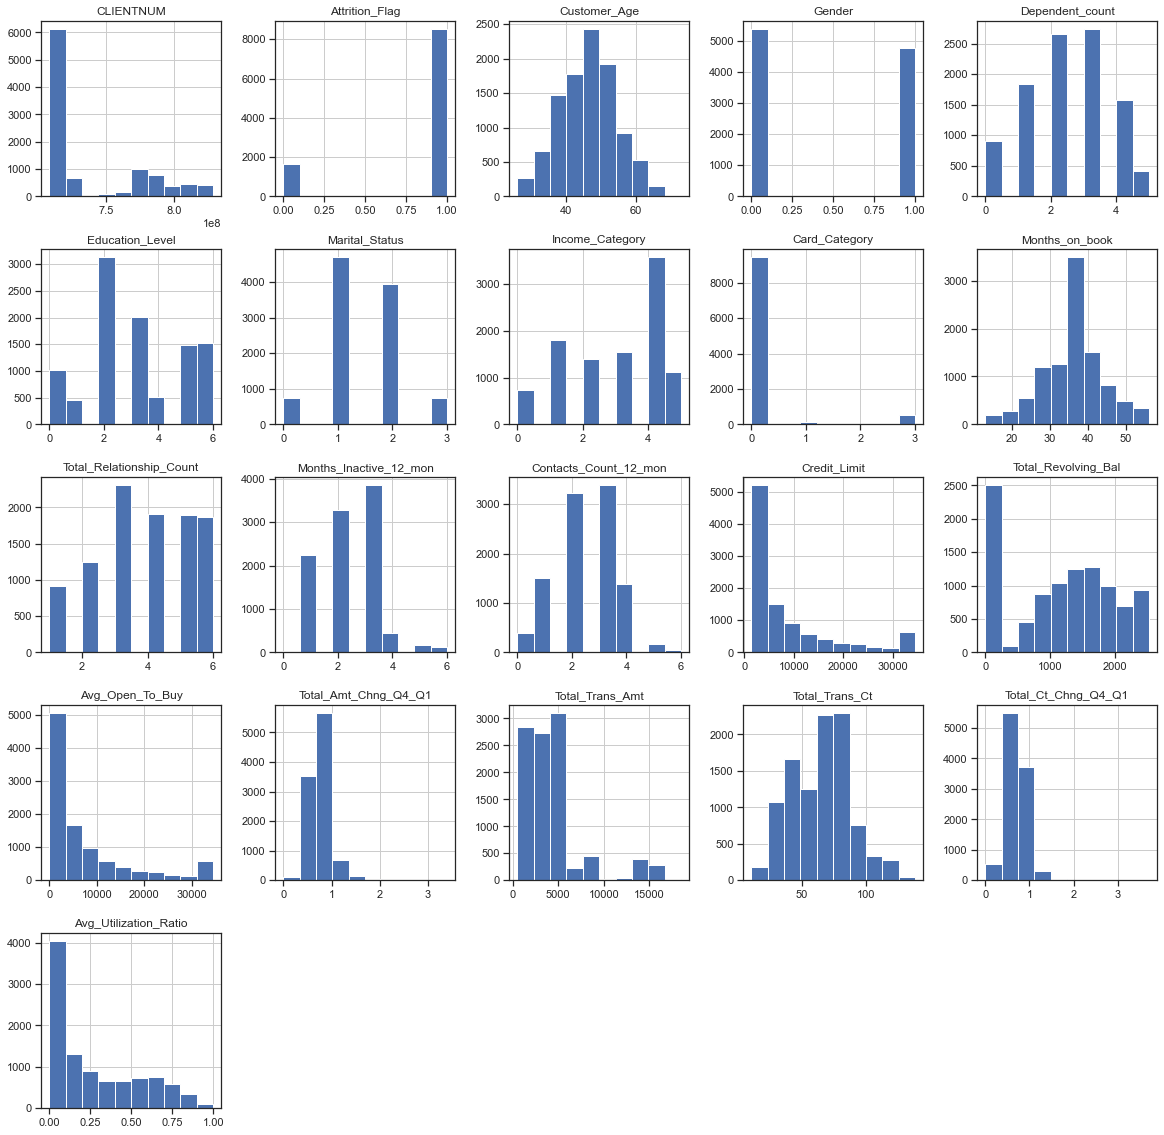

In [7]:
data.hist(figsize=(20,20))
plt.show()

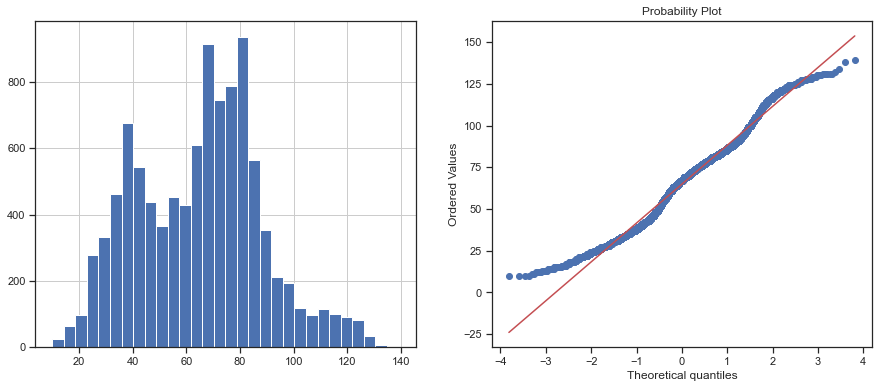

In [8]:
diagnostic_plots(data, 'Total_Trans_Ct')

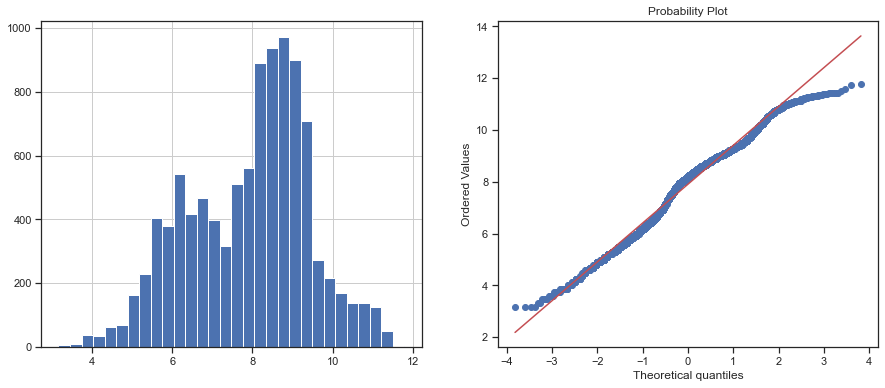

In [9]:
data['Total_Trans_Ct_sqrt'] = data['Total_Trans_Ct']**(1/2)
diagnostic_plots(data, 'Total_Trans_Ct_sqrt')

## Устранение пропусков в данных

In [3]:
skip = pd.read_csv('data/gold.csv', sep=",")

In [4]:
skip.shape


(172, 20)

In [5]:
list(zip(skip.columns, [i for i in skip.dtypes]))

[('Date', dtype('O')),
 ('US dollar (USD)', dtype('float64')),
 ('Euro (EUR)', dtype('float64')),
 ('Japanese yen (JPY)', dtype('float64')),
 ('Pound sterling (GBP)', dtype('float64')),
 ('Canadian dollar (CAD)', dtype('float64')),
 ('Swiss franc (CHF)', dtype('float64')),
 ('Indian rupee (INR)', dtype('float64')),
 ('Chinese renmimbi (CNY)', dtype('float64')),
 ('Turkish lira (TRY)', dtype('float64')),
 ('Saudi riyal (SAR)', dtype('float64')),
 ('Indonesian rupiah (IDR)', dtype('float64')),
 ('UAE dirham (AED)', dtype('float64')),
 ('Thai baht THB)', dtype('float64')),
 ('Vietnamese dong (VND)', dtype('float64')),
 ('Egyptian pound (EGP)', dtype('float64')),
 ('Korean won (KRW)', dtype('float64')),
 ('Russian ruble (RUB)', dtype('float64')),
 ('South African rand (ZAR)', dtype('float64')),
 ('Australian dollar (AUD)', dtype('float64'))]

In [6]:
skip.head()

,Date,US dollar (USD),Euro (EUR),Japanese yen (JPY),Pound sterling (GBP),Canadian dollar (CAD),Swiss franc (CHF),Indian rupee (INR),Chinese renmimbi (CNY),Turkish lira (TRY),Saudi riyal (SAR),Indonesian rupiah (IDR),UAE dirham (AED),Thai baht THB),Vietnamese dong (VND),Egyptian pound (EGP),Korean won (KRW),Russian ruble (RUB),South African rand (ZAR),Australian dollar (AUD)
0,Q1 1979,240.10,148.04,50274.29,116.22,278.16,406.20,1940.16,0.0,0.0,796.73,148844.15,910.39,4812.88,0.0,0.0,116123.63,0.0,202.37,214.55
1,Q2 1979,277.50,169.03,60161.40,127.29,322.55,457.71,2190.55,0.0,0.0,923.02,166854.38,1049.81,5477.29,0.0,0.0,133065.59,0.0,232.34,245.46
2,Q3 1979,397.25,233.23,89088.49,180.36,460.72,616.45,3190.26,0.0,0.0,1306.81,242994.79,1474.44,7894.94,0.0,0.0,191720.57,0.0,327.15,351.67
3,Q4 1979,512.00,299.12,125630.27,230.63,611.81,835.57,4189.64,0.0,0.0,1749.03,324101.29,2055.87,10645.23,0.0,0.0,253615.89,0.0,434.07,474.31
4,Q1 1980,494.50,321.56,125800.01,228.51,599.47,931.87,4155.35,0.0,0.0,1683.53,316964.84,1890.49,10312.81,0.0,0.0,294925.42,0.0,407.51,465.18


Датасет имеет пропуски, но они в данном случае заполнены нулевыми значениями. Приведём колонки, содержащие нули к виду, который воспринимает pandas и numpy:

In [7]:
#converting null-values
skip.loc[(skip['Chinese renmimbi (CNY)'] == 0.0), "Chinese renmimbi (CNY)"] = pd.NA
skip.loc[(skip['Turkish lira (TRY)'] == 0.0), "Turkish lira (TRY)"] = np.nan
skip.loc[(skip['Vietnamese dong (VND)'] == 0.0), "Vietnamese dong (VND)"] = pd.NA
skip.loc[(skip['Egyptian pound (EGP)'] == 0.0), "Egyptian pound (EGP)"] = pd.NA
skip.loc[(skip['Russian ruble (RUB)'] == 0.0), "Russian ruble (RUB)"] = pd.NA
skip.head()

,Date,US dollar (USD),Euro (EUR),Japanese yen (JPY),Pound sterling (GBP),Canadian dollar (CAD),Swiss franc (CHF),Indian rupee (INR),Chinese renmimbi (CNY),Turkish lira (TRY),Saudi riyal (SAR),Indonesian rupiah (IDR),UAE dirham (AED),Thai baht THB),Vietnamese dong (VND),Egyptian pound (EGP),Korean won (KRW),Russian ruble (RUB),South African rand (ZAR),Australian dollar (AUD)
0,Q1 1979,240.10,148.04,50274.29,116.22,278.16,406.20,1940.16,<NA>,NaN,796.73,148844.15,910.39,4812.88,<NA>,<NA>,116123.63,<NA>,202.37,214.55
1,Q2 1979,277.50,169.03,60161.40,127.29,322.55,457.71,2190.55,<NA>,NaN,923.02,166854.38,1049.81,5477.29,<NA>,<NA>,133065.59,<NA>,232.34,245.46
2,Q3 1979,397.25,233.23,89088.49,180.36,460.72,616.45,3190.26,<NA>,NaN,1306.81,242994.79,1474.44,7894.94,<NA>,<NA>,191720.57,<NA>,327.15,351.67
3,Q4 1979,512.00,299.12,125630.27,230.63,611.81,835.57,4189.64,<NA>,NaN,1749.03,324101.29,2055.87,10645.23,<NA>,<NA>,253615.89,<NA>,434.07,474.31
4,Q1 1980,494.50,321.56,125800.01,228.51,599.47,931.87,4155.35,<NA>,NaN,1683.53,316964.84,1890.49,10312.81,<NA>,<NA>,294925.42,<NA>,407.51,465.18


In [8]:
#проверяем, что теперь эти колонки видимы, как пропуски
cols_with_na = [col for col in skip.columns if skip[col].isnull().sum() > 0]
cols_with_na

['Chinese renmimbi (CNY)',
 'Turkish lira (TRY)',
 'Vietnamese dong (VND)',
 'Egyptian pound (EGP)',
 'Russian ruble (RUB)']

In [9]:
#считаем пропуски и заодно удостоверимся, что заменились только нули, а не все данные
[(col, skip[col].isnull().sum()) for col in cols_with_na]

[('Chinese renmimbi (CNY)', 24),
 ('Turkish lira (TRY)', 15),
 ('Vietnamese dong (VND)', 43),
 ('Egyptian pound (EGP)', 39),
 ('Russian ruble (RUB)', 56)]

In [10]:
# Вычислим проценты пропусков
[(col, skip[col].isnull().mean()) for col in cols_with_na]

[('Chinese renmimbi (CNY)', 0.13953488372093023),
 ('Turkish lira (TRY)', 0.0872093023255814),
 ('Vietnamese dong (VND)', 0.25),
 ('Egyptian pound (EGP)', 0.22674418604651161),
 ('Russian ruble (RUB)', 0.32558139534883723)]

Пропусков в колонках достаточно много, будем работать с колонкой турецкой лиры, у неё процент пропусков наименьший.

In [11]:
skip_drop = skip[['Turkish lira (TRY)']].dropna()
skip_drop.shape

(157, 1)

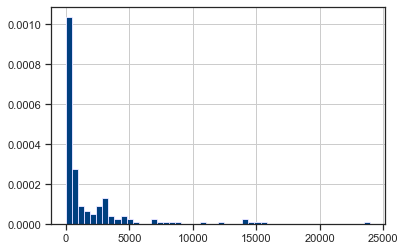

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
skip["Turkish lira (TRY)"].hist(bins=50, ax=ax, density=True, color='green')
skip_drop["Turkish lira (TRY)"].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
plt.show()

Распределение ассиметричное и от удаления пропусков почти не изменилось. Датасет небольшого размера, поэтому не будем использовать метод заполнения случайными значениями. Пропуски распределены случайно, распределение не выглядит однозначно одномодальным. Из-за ассиметричности заполним пустые значения медианой распределения.

In [13]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

In [14]:
all_data, filled_data, missed_data = impute_column(skip, 'Turkish lira (TRY)', 'median')

In [15]:
all_data

array([4.905400e+02, 4.905400e+02, 4.905400e+02, 4.905400e+02,
       4.905400e+02, 4.905400e+02, 4.905400e+02, 4.905400e+02,
       4.905400e+02, 4.905400e+02, 4.905400e+02, 4.905400e+02,
       4.905400e+02, 4.905400e+02, 4.905400e+02, 8.000000e-02,
       8.000000e-02, 9.000000e-02, 1.000000e-01, 1.100000e-01,
       1.200000e-01, 1.400000e-01, 1.400000e-01, 1.400000e-01,
       1.500000e-01, 1.700000e-01, 1.800000e-01, 1.800000e-01,
       2.200000e-01, 2.300000e-01, 2.900000e-01, 2.800000e-01,
       3.300000e-01, 3.800000e-01, 4.200000e-01, 4.700000e-01,
       5.400000e-01, 6.100000e-01, 6.400000e-01, 7.500000e-01,
       7.800000e-01, 8.000000e-01, 7.900000e-01, 9.200000e-01,
       8.800000e-01, 9.200000e-01, 1.120000e+00, 1.120000e+00,
       1.320000e+00, 1.600000e+00, 1.650000e+00, 1.800000e+00,
       2.140000e+00, 2.370000e+00, 2.530000e+00, 2.860000e+00,
       3.190000e+00, 4.140000e+00, 4.370000e+00, 5.830000e+00,
       1.010000e+01, 1.204000e+01, 1.351000e+01, 1.4830

In [16]:
filled_data

array([490.54, 490.54, 490.54, 490.54, 490.54, 490.54, 490.54, 490.54,
       490.54, 490.54, 490.54, 490.54, 490.54, 490.54, 490.54])

In [17]:
missed_data

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan])